In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functions import clean


df = pd.read_csv("dataset_house_apartment.csv")

# Comparisons between all the variables except for the price

## Locality

#### By type of property

In [2]:
locality_type = clean(df, [0,1])

locality : nbr ligne = 52077
52077
type_of_property : nbr ligne = 52077
52077


In [3]:
province_house = locality_type[locality_type['type_of_property'] == 'house'].groupby('province').locality.agg(['count'])

province_apart = locality_type[locality_type['type_of_property'] == 'apartment'].groupby('province').locality.agg(['count'])

province_house.reset_index(level=0, inplace=True)
province_house = province_house.rename(columns={'count':'Number of Houses'})
province_apart.reset_index(level=0, inplace=True)
province_apart = province_apart.rename(columns={'count':'Number of Apartments'})

province_type = pd.merge(province_house, province_apart, how = 'outer', on='province')

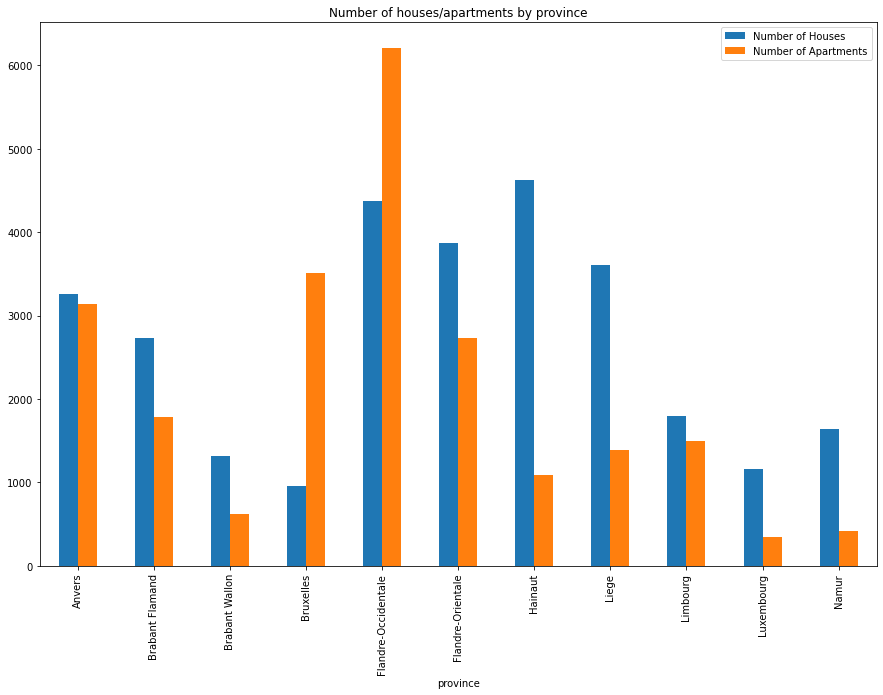

In [4]:
province_type.plot.bar(x = 'province', 
                       y = ['Number of Houses', 'Number of Apartments'], 
                       figsize=(15,10), 
                       title="Number of houses/apartments by province")

#### By subtype of property

In [5]:
locality_subtype = clean(df, [0, 1, 2])

locality : nbr ligne = 52077
52077
type_of_property : nbr ligne = 52077
52077
subtype_of_property : nbr ligne = 52077
52077


In [6]:
province_house_sub = locality_subtype[locality_subtype['type_of_property'] == 'house']

dataframes = []
for element in ['Anvers', 
                'Brabant Flamand', 
                'Brabant Wallon', 
                'Bruxelles', 
                'Flandre-Occidentale',
                'Flandre-Orientale',
                'Hainaut',
                'Liege',
                'Limbourg',
                'Luxembourg',
                'Namur'
               ]:
    dataframe = province_house_sub[province_house_sub['province'] == element].subtype_of_property.agg(['value_counts'])
    dataframe.reset_index(level=0, inplace=True)
    dataframe = dataframe.rename(columns={'index':'Subtype', 'value_counts':element})
    dataframes.append(dataframe)

house_subtype_province = pd.merge(dataframes[0], dataframes[1], how = 'outer', on='Subtype')

for i in range(2, len(dataframes)):
    house_subtype_province = pd.merge(house_subtype_province, dataframes[i], how = 'outer', on='Subtype')
    
house_subtype_province

,Subtype,Anvers,Brabant Flamand,Brabant Wallon,Bruxelles,Flandre-Occidentale,Flandre-Orientale,Hainaut,Liege,Limbourg,Luxembourg,Namur
0,house,2512.0,2001.0,788.0,580.0,3583,3179.0,3389.0,2555.0,1478.0,886.0,1149.0
1,villa,298.0,374.0,345.0,13.0,411,241.0,480.0,281.0,120.0,69.0,199.0
2,mixed use building,118.0,77.0,37.0,64.0,57,100.0,199.0,174.0,66.0,51.0,44.0
3,town house,71.0,60.0,25.0,42.0,39,32.0,49.0,74.0,1.0,5.0,11.0
4,mansion,65.0,24.0,12.0,36.0,82,70.0,76.0,40.0,21.0,6.0,29.0
5,apartment block,62.0,42.0,23.0,204.0,44,79.0,232.0,232.0,14.0,32.0,80.0
6,exceptional property,45.0,51.0,32.0,14.0,37,41.0,66.0,83.0,12.0,40.0,29.0
7,manor house,23.0,6.0,NaN,NaN,12,10.0,7.0,6.0,16.0,3.0,2.0
8,country cottage,23.0,43.0,28.0,NaN,38,43.0,57.0,20.0,26.0,12.0,30.0
9,other property,18.0,8.0,3.0,1.0,17,8.0,9.0,11.0,3.0,4.0,4.0


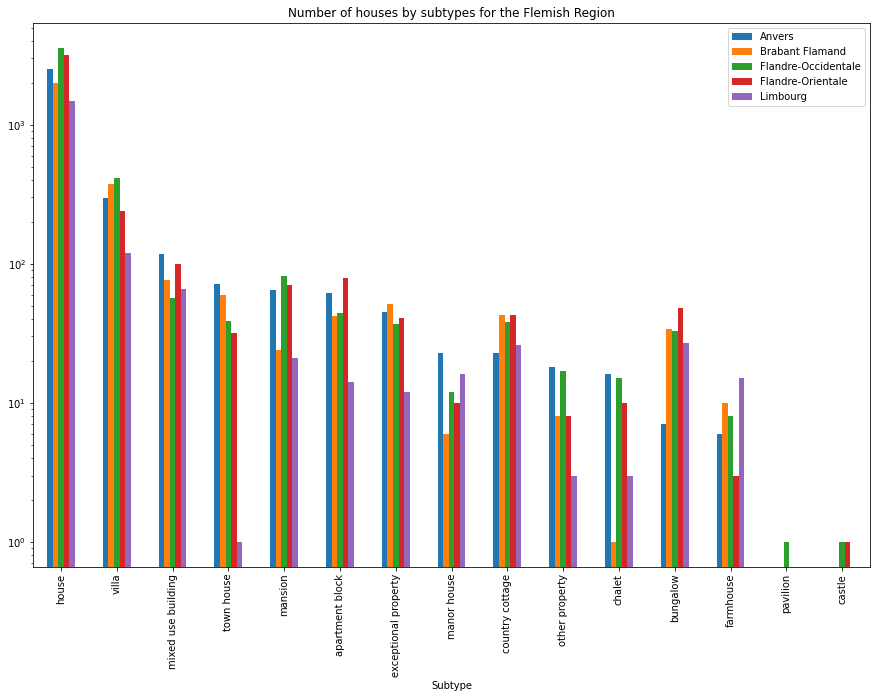

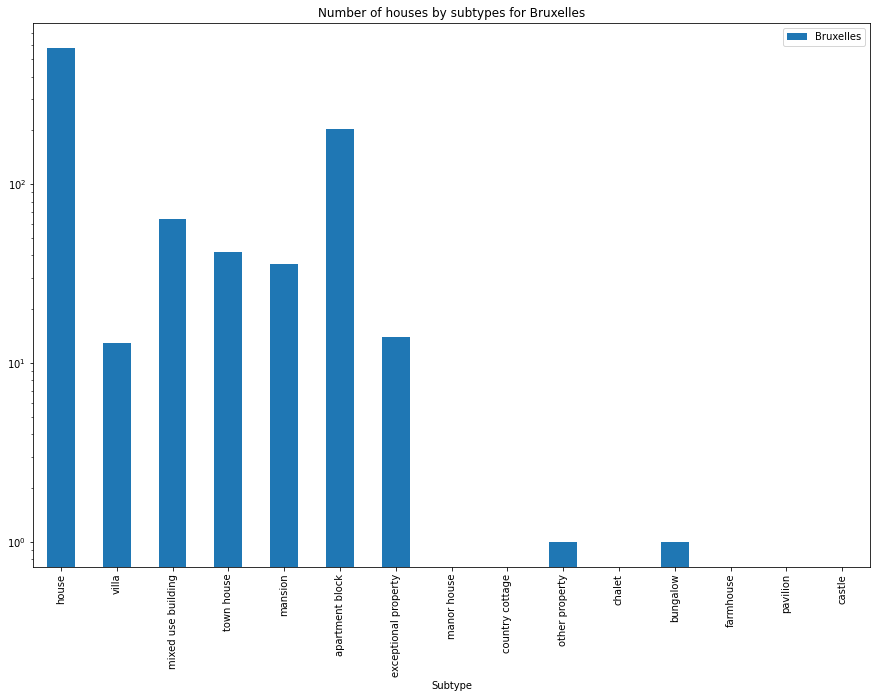

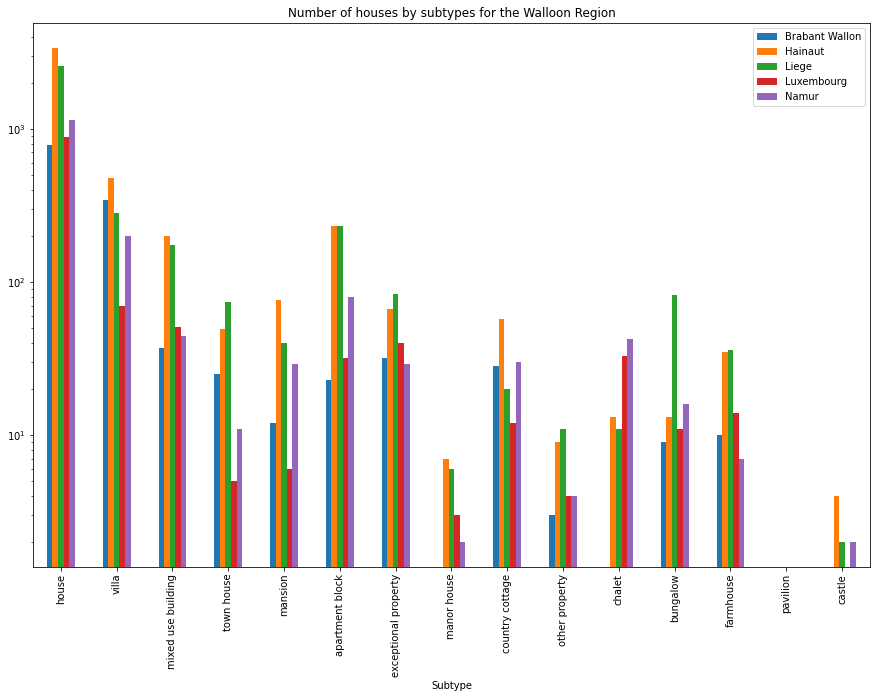

In [7]:
house_subtype_province.plot.bar(x = 'Subtype', 
                                y = ['Anvers', 
                                      'Brabant Flamand',
                                      'Flandre-Occidentale',
                                      'Flandre-Orientale',
                                      'Limbourg'],
                               logy=True,
                               figsize=(15,10),
                               title="Number of houses by subtypes for the Flemish Region")


house_subtype_province.plot.bar(x = 'Subtype', 
                                y = 'Bruxelles',
                               logy=True,
                               figsize=(15,10),
                               title="Number of houses by subtypes for Bruxelles")

house_subtype_province.plot.bar(x = 'Subtype', 
                                y = ['Brabant Wallon',
                                      'Hainaut',
                                      'Liege',
                                      'Luxembourg',
                                      'Namur'],
                               logy=True,
                               figsize=(15,10),
                               title="Number of houses by subtypes for the Walloon Region")

In [8]:
dataframes = []
for element in ['house', 
                'villa', 
                'mixed use building', 
                'town house', 
                'mansion',
                'apartment block',
                'exceptional property',
                'country cottage',
                'manor house', 
                'other property',
                'chalet',
                'bungalow',
                'farmhouse',
                'castle',
                'pavilion'
               ]:
    dataframe = province_house_sub[province_house_sub['subtype_of_property'] == element].province.agg(['value_counts'])
    dataframe.reset_index(level=0, inplace=True)
    dataframe = dataframe.rename(columns={'index':'Province', 'value_counts':element})
    dataframes.append(dataframe)

house_province_subtype = pd.merge(dataframes[0], dataframes[1], how = 'outer', on='Province')

for i in range(2, len(dataframes)):
    house_province_subtype = pd.merge(house_province_subtype, dataframes[i], how = 'outer', on='Province')

house_province_subtype

,Province,house,villa,mixed use building,town house,mansion,apartment block,exceptional property,country cottage,manor house,other property,chalet,bungalow,farmhouse,castle,pavilion
0,Flandre-Occidentale,3583,411,57,39,82,44,37,38.0,12.0,17,15.0,33,8.0,1.0,1.0
1,Hainaut,3389,480,199,49,76,232,66,57.0,7.0,9,13.0,13,35.0,4.0,NaN
2,Flandre-Orientale,3179,241,100,32,70,79,41,43.0,10.0,8,10.0,48,3.0,1.0,NaN
3,Liege,2555,281,174,74,40,232,83,20.0,6.0,11,11.0,82,36.0,2.0,NaN
4,Anvers,2512,298,118,71,65,62,45,23.0,23.0,18,16.0,7,6.0,NaN,NaN
5,Brabant Flamand,2001,374,77,60,24,42,51,43.0,6.0,8,1.0,34,10.0,NaN,NaN
6,Limbourg,1478,120,66,1,21,14,12,26.0,16.0,3,3.0,27,15.0,NaN,NaN
7,Namur,1149,199,44,11,29,80,29,30.0,2.0,4,42.0,16,7.0,2.0,NaN
8,Luxembourg,886,69,51,5,6,32,40,12.0,3.0,4,33.0,11,14.0,NaN,NaN
9,Brabant Wallon,788,345,37,25,12,23,32,28.0,NaN,3,NaN,9,10.0,NaN,NaN


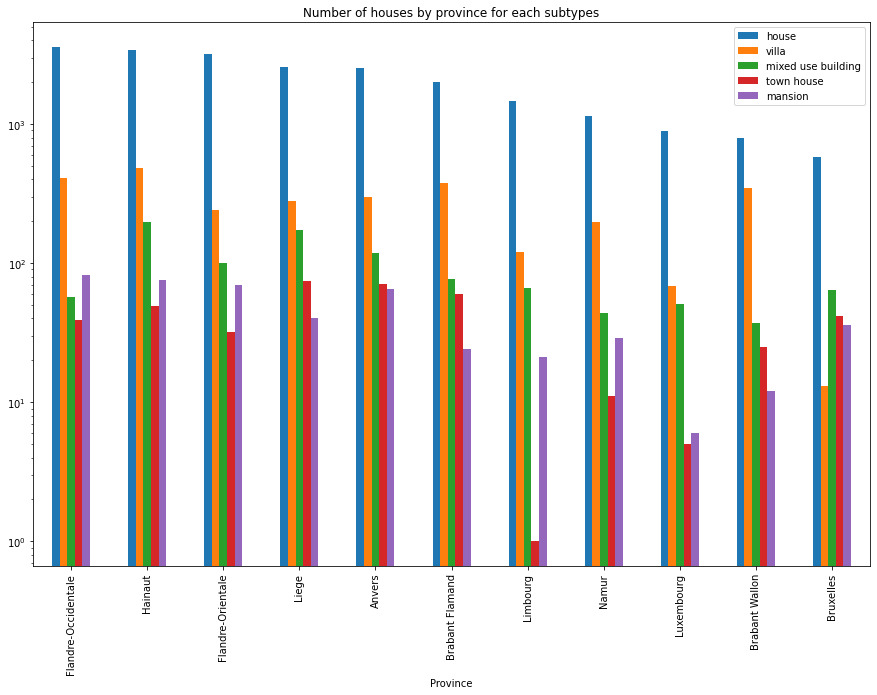

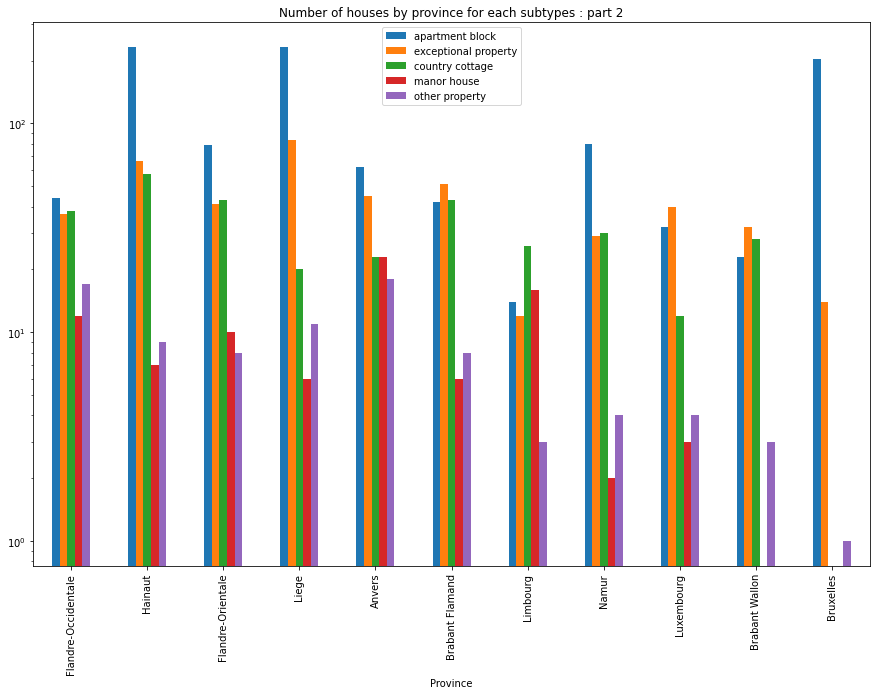

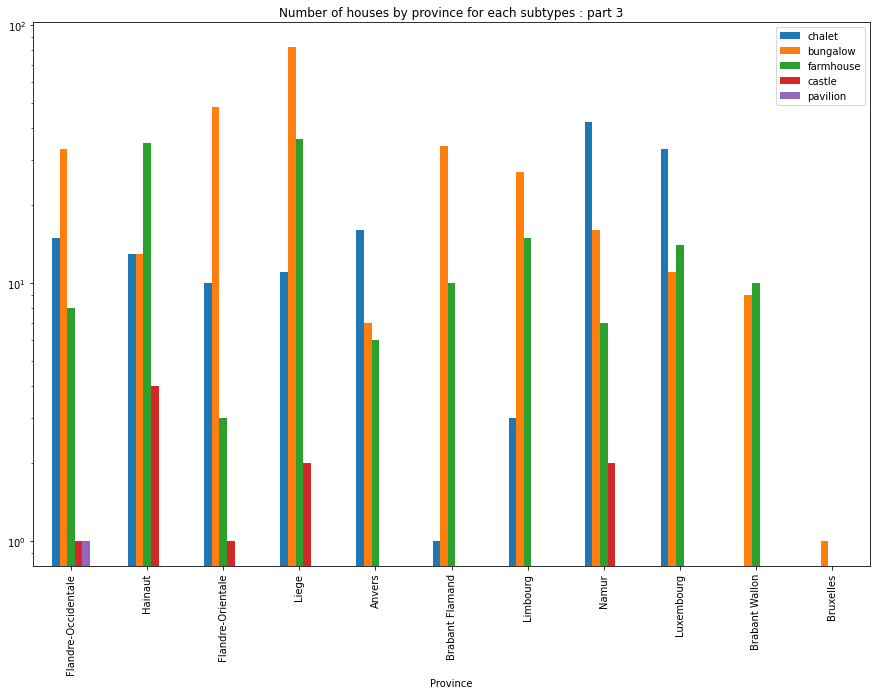

In [9]:
house_province_subtype.plot.bar(x = 'Province', 
                                y = ['house', 
                                    'villa', 
                                    'mixed use building', 
                                    'town house', 
                                    'mansion',
                                   ],
                               logy=True,
                               figsize=(15,10),
                               title="Number of houses by province for each subtypes")

house_province_subtype.plot.bar(x = 'Province', 
                                y = ['apartment block',
                                    'exceptional property',
                                    'country cottage',
                                    'manor house', 
                                    'other property'
                                   ],
                               logy=True,
                               figsize=(15,10),
                               title="Number of houses by province for each subtypes : part 2")

house_province_subtype.plot.bar(x = 'Province', 
                                y = ['chalet',
                                    'bungalow',
                                    'farmhouse',
                                    'castle',
                                    'pavilion'
                                   ],
                               logy=True,
                               figsize=(15,10),
                               title="Number of houses by province for each subtypes : part 3")

In [10]:
province_apart_sub = locality_subtype[locality_subtype['type_of_property'] == 'apartment']

dataframes = []
for element in ['Anvers', 
                'Brabant Flamand', 
                'Brabant Wallon', 
                'Bruxelles', 
                'Flandre-Occidentale',
                'Flandre-Orientale',
                'Hainaut',
                'Liege',
                'Limbourg',
                'Luxembourg',
                'Namur'
               ]:
    dataframe = province_apart_sub[province_apart_sub['province'] == element].subtype_of_property.agg(['value_counts'])
    dataframe.reset_index(level=0, inplace=True)
    dataframe = dataframe.rename(columns={'index':'Subtype', 'value_counts':element})
    dataframes.append(dataframe)

apart_subtype_province = pd.merge(dataframes[0], dataframes[1], how = 'outer', on='Subtype')

for i in range(2, len(dataframes)):
    apart_subtype_province = pd.merge(apart_subtype_province, dataframes[i], how = 'outer', on='Subtype')

apart_subtype_province

,Subtype,Anvers,Brabant Flamand,Brabant Wallon,Bruxelles,Flandre-Occidentale,Flandre-Orientale,Hainaut,Liege,Limbourg,Luxembourg,Namur
0,apartment,2453,1147,432.0,2637,4971,2180,894,1148.0,1154,283.0,318.0
1,ground floor,222,151,72.0,180,150,145,53,65.0,123,18.0,22.0
2,duplex,134,223,64.0,199,307,159,76,84.0,95,33.0,37.0
3,penthouse,130,81,30.0,212,178,114,27,41.0,79,3.0,13.0
4,service flat,70,67,5.0,13,57,59,2,NaN,21,NaN,3.0
5,flat studio,57,67,7.0,187,485,32,15,27.0,7,2.0,20.0
6,kot,35,21,NaN,1,24,3,1,NaN,1,2.0,NaN
7,loft,28,25,2.0,58,28,33,19,14.0,13,NaN,3.0
8,triplex,13,6,6.0,22,4,4,3,12.0,3,NaN,NaN


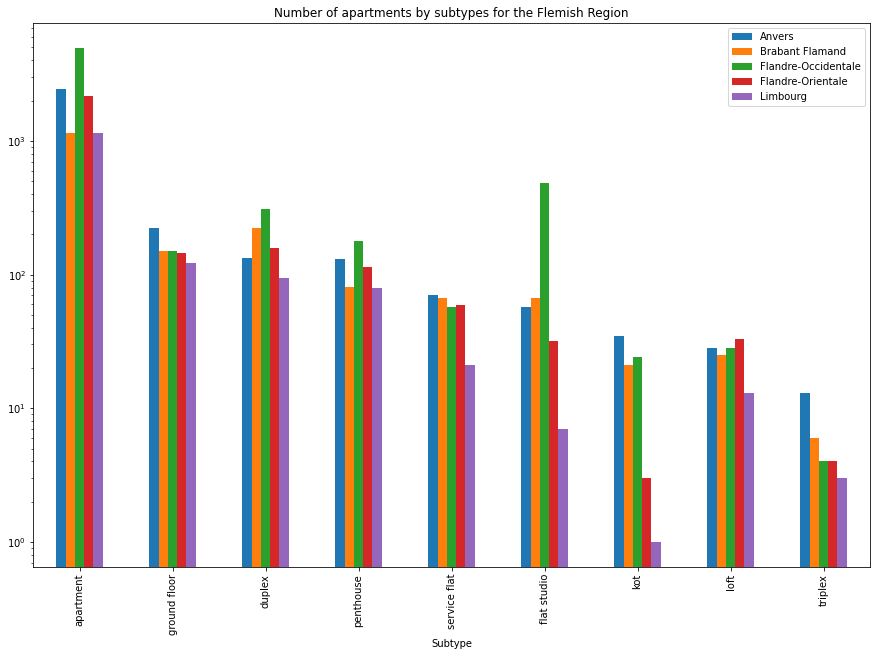

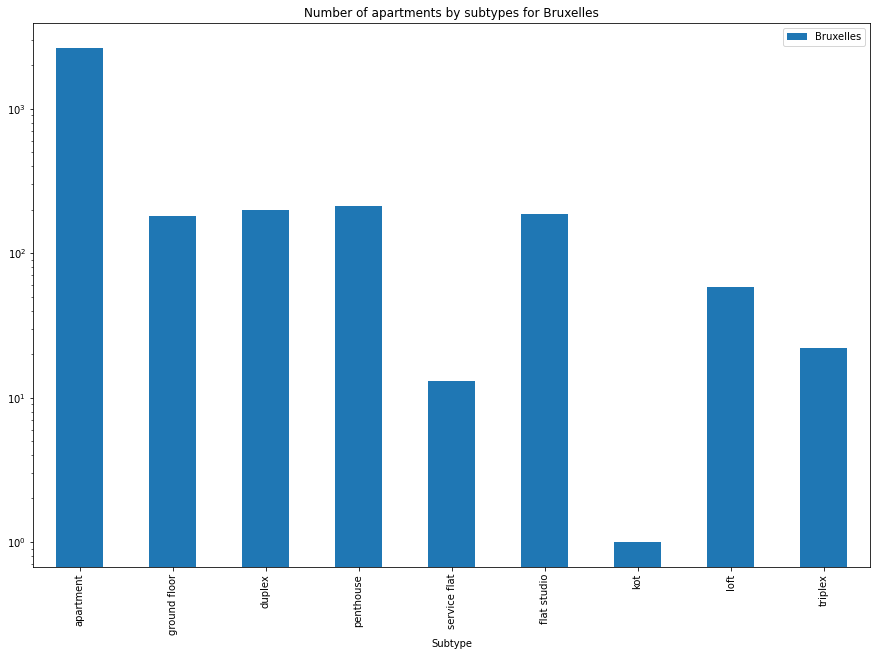

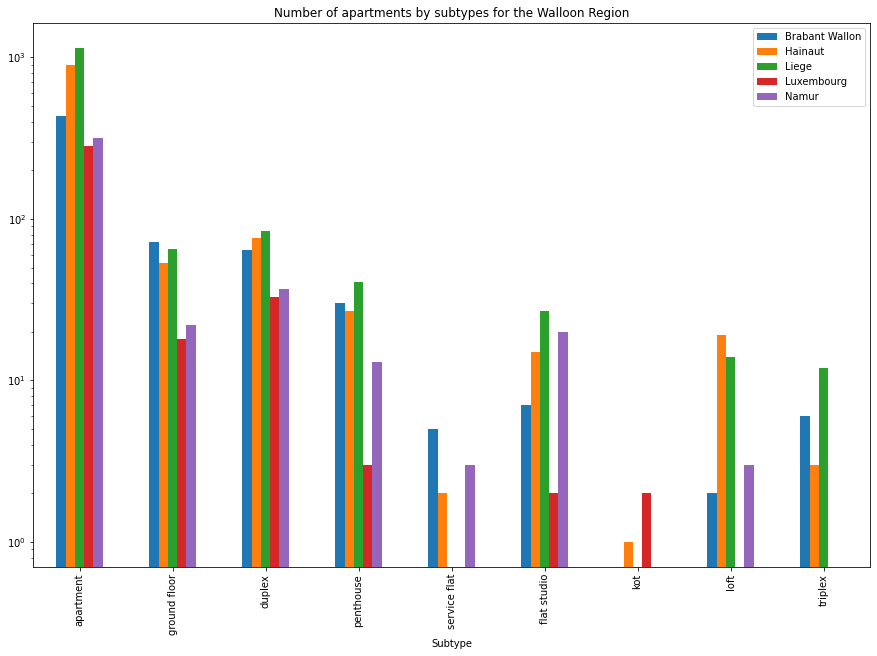

In [11]:
apart_subtype_province.plot.bar(x = 'Subtype', 
                                y = ['Anvers', 
                                      'Brabant Flamand',
                                      'Flandre-Occidentale',
                                      'Flandre-Orientale',
                                      'Limbourg'],
                               logy=True,
                               figsize=(15,10),
                               title="Number of apartments by subtypes for the Flemish Region")

apart_subtype_province.plot.bar(x = 'Subtype', 
                                y = 'Bruxelles',
                               logy=True,
                               figsize=(15,10),
                               title="Number of apartments by subtypes for Bruxelles")

apart_subtype_province.plot.bar(x = 'Subtype', 
                                y = ['Brabant Wallon',
                                      'Hainaut',
                                      'Liege',
                                      'Luxembourg',
                                      'Namur'],
                               logy=True,
                               figsize=(15,10),
                               title="Number of apartments by subtypes for the Walloon Region")

In [12]:
dataframes = []
for element in ['apartment', 
                'ground floor', 
                'duplex', 
                'penthouse', 
                'service flat',
                'flat studio',
                'kot',
                'loft',
                'triplex'
               ]:
    dataframe = province_apart_sub[province_apart_sub['subtype_of_property'] == element].province.agg(['value_counts'])
    dataframe.reset_index(level=0, inplace=True)
    dataframe = dataframe.rename(columns={'index':'Province', 'value_counts':element})
    dataframes.append(dataframe)

apart_province_subtype = pd.merge(dataframes[0], dataframes[1], how = 'outer', on='Province')

for i in range(2, len(dataframes)):
    apart_province_subtype = pd.merge(apart_province_subtype, dataframes[i], how = 'outer', on='Province')

apart_province_subtype

,Province,apartment,ground floor,duplex,penthouse,service flat,flat studio,kot,loft,triplex
0,Flandre-Occidentale,4971,150,307,178,57.0,485,24.0,28.0,4.0
1,Bruxelles,2637,180,199,212,13.0,187,1.0,58.0,22.0
2,Anvers,2453,222,134,130,70.0,57,35.0,28.0,13.0
3,Flandre-Orientale,2180,145,159,114,59.0,32,3.0,33.0,4.0
4,Limbourg,1154,123,95,79,21.0,7,1.0,13.0,3.0
5,Liege,1148,65,84,41,NaN,27,NaN,14.0,12.0
6,Brabant Flamand,1147,151,223,81,67.0,67,21.0,25.0,6.0
7,Hainaut,894,53,76,27,2.0,15,1.0,19.0,3.0
8,Brabant Wallon,432,72,64,30,5.0,7,NaN,2.0,6.0
9,Namur,318,22,37,13,3.0,20,NaN,3.0,NaN


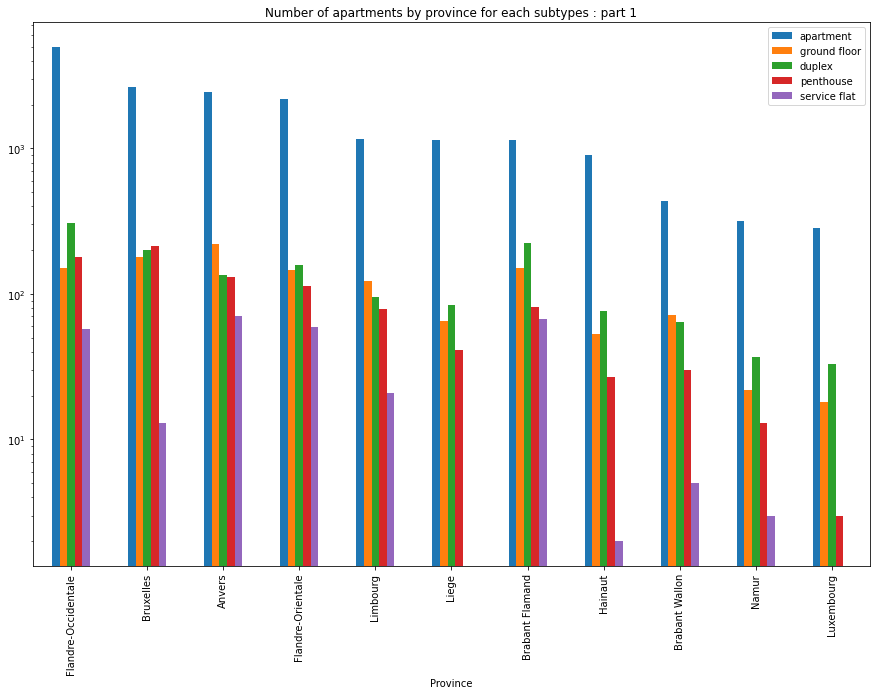

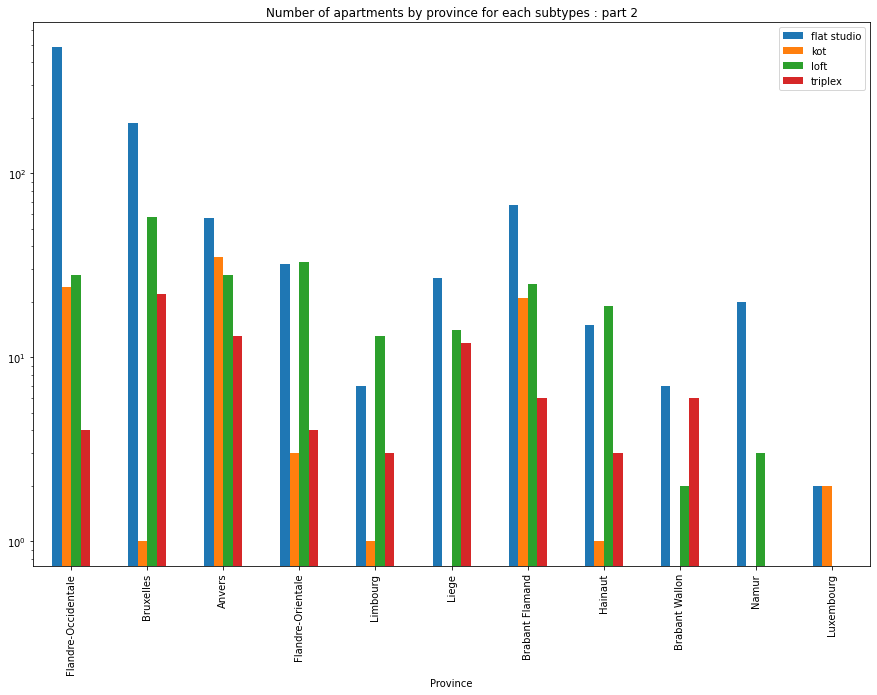

In [13]:
apart_province_subtype.plot.bar(x = 'Province', 
                                y = ['apartment', 
                                    'ground floor', 
                                    'duplex', 
                                    'penthouse', 
                                    'service flat'
                                   ],
                               logy=True,
                               figsize=(15,10),
                               title="Number of apartments by province for each subtypes : part 1")

apart_province_subtype.plot.bar(x = 'Province', 
                                y = ['flat studio',
                                    'kot',
                                    'loft',
                                    'triplex'
                                   ],
                               logy=True,
                               figsize=(15,10),
                               title="Number of apartments by province for each subtypes : part 2")

#### By number of bedrooms

In [14]:
locality_bedrooms = clean(df, [0,1,5])

locality : nbr ligne = 52077
52077
type_of_property : nbr ligne = 52077
52077
number_of_rooms : nbr ligne = 52077
52077


In [15]:
house_loc_bedrooms = locality_bedrooms[locality_bedrooms['type_of_property'] == 'house']

dataframes = []
for element in ['Anvers', 
                'Brabant Flamand', 
                'Brabant Wallon', 
                'Bruxelles', 
                'Flandre-Occidentale',
                'Flandre-Orientale',
                'Hainaut',
                'Liege',
                'Limbourg',
                'Luxembourg',
                'Namur'
               ]:
    dataframe = house_loc_bedrooms[house_loc_bedrooms['province'] == element].number_of_rooms.agg(['value_counts'])
    dataframe.reset_index(level=0, inplace=True)
    dataframe = dataframe.rename(columns={'index':'Number of bedrooms', 'value_counts':element})
    dataframes.append(dataframe)

house_bedrooms_province = pd.merge(dataframes[0], dataframes[1], how = 'outer', on='Number of bedrooms')

for i in range(2, len(dataframes)):
    house_bedrooms_province = pd.merge(house_bedrooms_province, dataframes[i], how = 'outer', on='Number of bedrooms')
    

house_bedrooms_province = house_bedrooms_province.sort_values('Number of bedrooms')

house_bedrooms_province

,Number of bedrooms,Anvers,Brabant Flamand,Brabant Wallon,Bruxelles,Flandre-Occidentale,Flandre-Orientale,Hainaut,Liege,Limbourg,Luxembourg,Namur
6,0.0,31.0,23.0,5.0,35.0,45.0,36.0,96.0,49.0,14.0,10.0,28.0
5,1.0,61.0,45.0,21.0,10.0,70.0,68.0,141.0,113.0,30.0,35.0,67.0
2,2.0,441.0,336.0,150.0,59.0,537.0,604.0,1129.0,613.0,182.0,147.0,261.0
0,3.0,1521.0,1237.0,457.0,211.0,2222.0,1895.0,1814.0,1382.0,947.0,402.0,599.0
1,4.0,782.0,704.0,401.0,270.0,1036.0,847.0,901.0,860.0,417.0,289.0,369.0
3,5.0,285.0,252.0,187.0,166.0,348.0,282.0,299.0,297.0,141.0,123.0,158.0
4,6.0,98.0,89.0,65.0,107.0,77.0,86.0,140.0,165.0,45.0,67.0,83.0
7,7.0,25.0,37.0,18.0,36.0,16.0,19.0,46.0,56.0,14.0,32.0,29.0
8,8.0,11.0,2.0,3.0,31.0,14.0,15.0,21.0,25.0,3.0,16.0,17.0
9,9.0,5.0,2.0,2.0,11.0,5.0,5.0,11.0,18.0,4.0,10.0,7.0


In [16]:
dataframes = []
for element in [0.0,
                1.0,
                2.0,
                3.0,
                4.0,
                5.0,
                6.0,
                7.0,
                8.0,
                9.0,
                10.0,
                11.0,
                12.0,
                13.0,
                14.0,
                15.0,
                16.0,
                17.0,
                18.0,
                19.0,
                20.0,
                22.0,
                23.0,
                24.0,
                30.0,
                165.0]:
    dataframe = house_loc_bedrooms[house_loc_bedrooms['number_of_rooms'] == element].province.agg(['value_counts'])
    dataframe.reset_index(level=0, inplace=True)
    dataframe = dataframe.rename(columns={'index':'Province', 'value_counts':element})
    dataframes.append(dataframe)

house_province_bedrooms = pd.merge(dataframes[0], dataframes[1], how = 'outer', on='Province')

for i in range(2, len(dataframes)):
    house_province_bedrooms = pd.merge(house_province_bedrooms, dataframes[i], how = 'outer', on='Province')

house_province_bedrooms

,Province,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,16.0,17.0,18.0,19.0,20.0,22.0,23.0,24.0,30.0,165.0
0,Hainaut,96,141,1129,1814,901,299,140,46,21,...,1.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0
1,Liege,49,113,613,1382,860,297,165,56,25,...,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2,Flandre-Occidentale,45,70,537,2222,1036,348,77,16,14,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Flandre-Orientale,36,68,604,1895,847,282,86,19,15,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
4,Bruxelles,35,10,59,211,270,166,107,36,31,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,Anvers,31,61,441,1521,782,285,98,25,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Namur,28,67,261,599,369,158,83,29,17,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
7,Brabant Flamand,23,45,336,1237,704,252,89,37,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Limbourg,14,30,182,947,417,141,45,14,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Luxembourg,10,35,147,402,289,123,67,32,16,...,3.0,2.0,2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN


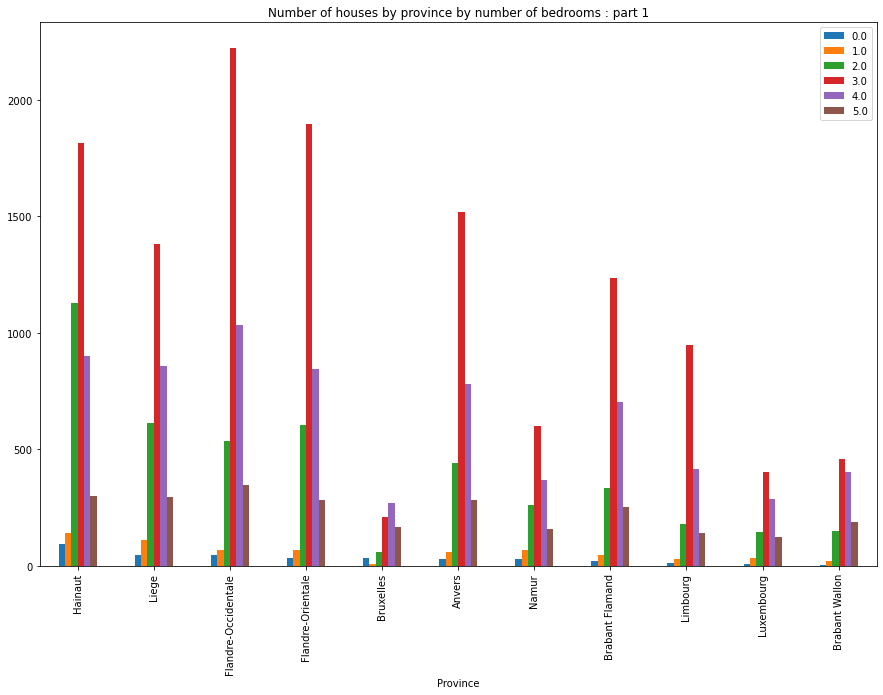

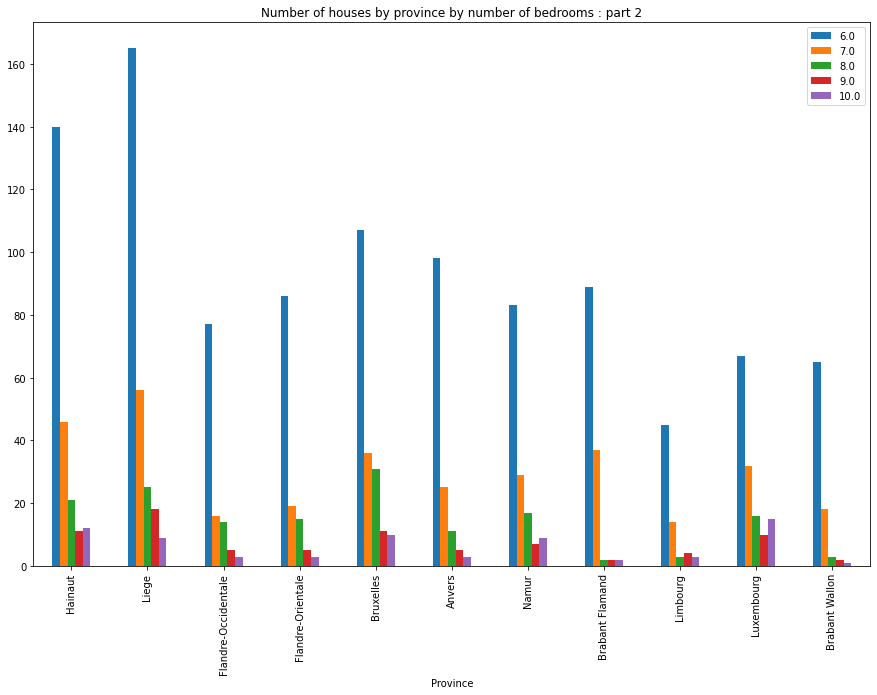

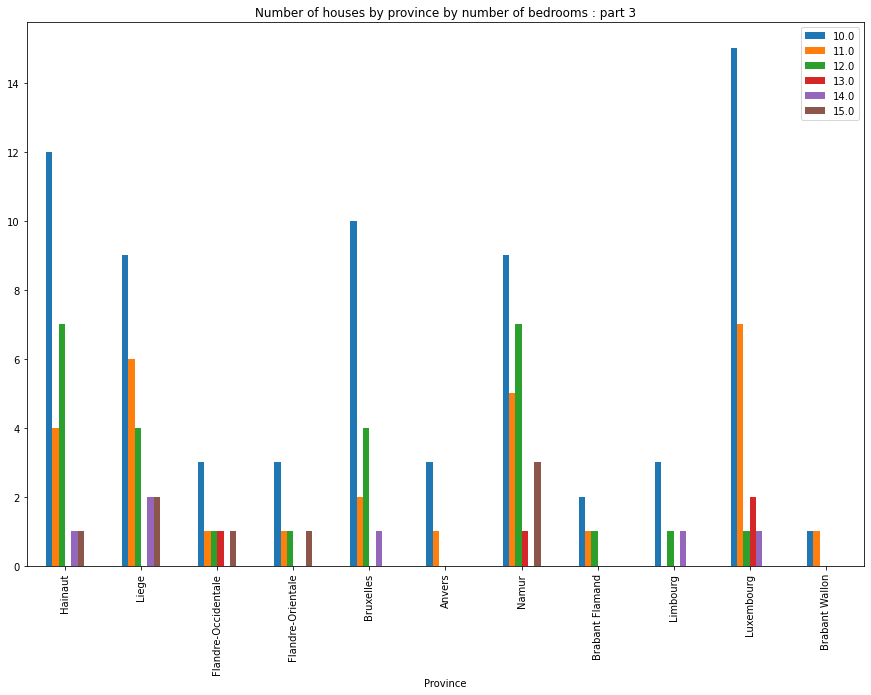

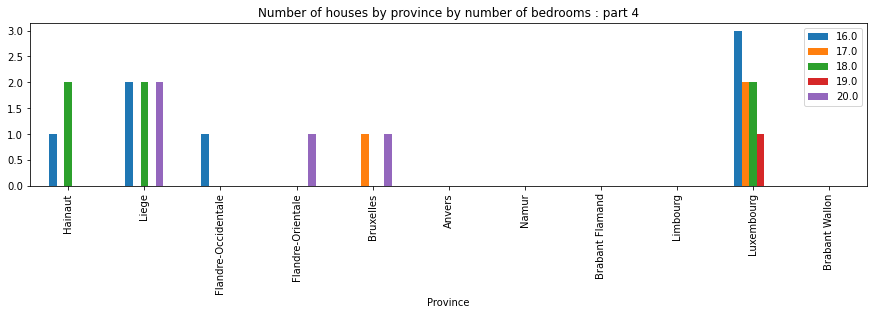

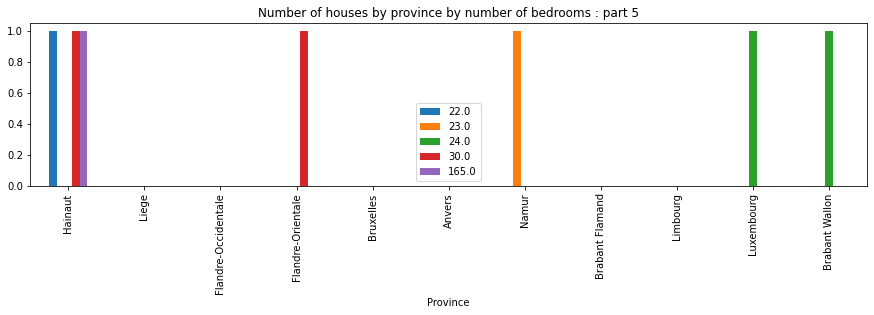

In [17]:
house_province_bedrooms.plot.bar(x = 'Province', 
                                y = [0.0,
                                    1.0,
                                    2.0,
                                    3.0,
                                    4.0,
                                    5.0
                                   ],
                               figsize=(15,10),
                               title="Number of houses by province by number of bedrooms : part 1")

house_province_bedrooms.plot.bar(x = 'Province', 
                                y = [6.0,
                                    7.0,
                                    8.0,
                                    9.0,
                                    10.0
                                   ],
                               figsize=(15,10),
                               title="Number of houses by province by number of bedrooms : part 2")

house_province_bedrooms.plot.bar(x = 'Province', 
                                y = [10.0,
                                    11.0,
                                    12.0,
                                    13.0,
                                    14.0,
                                    15.0
                                   ],
                               figsize=(15,10),
                               title="Number of houses by province by number of bedrooms : part 3")

house_province_bedrooms.plot.bar(x = 'Province', 
                                y = [16.0,
                                    17.0,
                                    18.0,
                                    19.0,
                                    20.0
                                   ],
                               figsize=(15,3),
                               title="Number of houses by province by number of bedrooms : part 4")

house_province_bedrooms.plot.bar(x = 'Province', 
                                y = [22.0,
                                    23.0,
                                    24.0,
                                    30.0,
                                    165.0
                                   ],
                               figsize=(15,3),
                               title="Number of houses by province by number of bedrooms : part 5")

In [18]:
apart_loc_bedrooms = locality_bedrooms[locality_bedrooms['type_of_property'] == 'apartment']

apart_loc_bedrooms = locality_bedrooms[locality_bedrooms['type_of_property'] == 'apartment']

dataframes = []
for element in ['Anvers', 
                'Brabant Flamand', 
                'Brabant Wallon', 
                'Bruxelles', 
                'Flandre-Occidentale',
                'Flandre-Orientale',
                'Hainaut',
                'Liege',
                'Limbourg',
                'Luxembourg',
                'Namur'
               ]:
    dataframe = apart_loc_bedrooms[apart_loc_bedrooms['province'] == element].number_of_rooms.agg(['value_counts'])
    dataframe.reset_index(level=0, inplace=True)
    dataframe = dataframe.rename(columns={'index':'Number of bedrooms', 'value_counts':element})
    dataframes.append(dataframe)

apart_bedrooms_province = pd.merge(dataframes[0], dataframes[1], how = 'outer', on='Number of bedrooms')

for i in range(2, len(dataframes)):
    apart_bedrooms_province = pd.merge(apart_bedrooms_province, dataframes[i], how = 'outer', on='Number of bedrooms')
    

apart_bedrooms_province = apart_bedrooms_province.sort_values('Number of bedrooms')

apart_bedrooms_province

,Number of bedrooms,Anvers,Brabant Flamand,Brabant Wallon,Bruxelles,Flandre-Occidentale,Flandre-Orientale,Hainaut,Liege,Limbourg,Luxembourg,Namur
4,0.0,51.0,33.0,5.0,157.0,480.0,26.0,22.0,18.0,8.0,1.0,13.0
1,1.0,671.0,381.0,103.0,738.0,1307.0,506.0,171.0,224.0,236.0,81.0,106.0
0,2.0,1711.0,962.0,295.0,1653.0,3302.0,1565.0,630.0,808.0,930.0,173.0,211.0
2,3.0,625.0,364.0,200.0,795.0,997.0,567.0,208.0,301.0,291.0,80.0,78.0
3,4.0,64.0,40.0,11.0,141.0,92.0,37.0,44.0,26.0,20.0,3.0,8.0
5,5.0,7.0,2.0,1.0,22.0,14.0,11.0,4.0,9.0,4.0,1.0,NaN
7,6.0,5.0,3.0,NaN,3.0,7.0,10.0,1.0,2.0,4.0,1.0,NaN
9,7.0,1.0,NaN,NaN,NaN,1.0,3.0,1.0,NaN,NaN,NaN,NaN
6,8.0,6.0,1.0,NaN,NaN,3.0,1.0,4.0,3.0,NaN,NaN,NaN
11,9.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,3.0,1.0,NaN


In [19]:
dataframes = []
for element in [0.0,
                1.0,
                2.0,
                3.0,
                4.0,
                5.0,
                6.0,
                7.0,
                8.0,
                9.0,
                10.0,
                11.0,
                13.0,
                33.0,
                204.0]:
    dataframe = apart_loc_bedrooms[apart_loc_bedrooms['number_of_rooms'] == element].province.agg(['value_counts'])
    dataframe.reset_index(level=0, inplace=True)
    dataframe = dataframe.rename(columns={'index':'Province', 'value_counts':element})
    dataframes.append(dataframe)

apart_province_bedrooms = pd.merge(dataframes[0], dataframes[1], how = 'outer', on='Province')

for i in range(2, len(dataframes)):
    apart_province_bedrooms = pd.merge(apart_province_bedrooms, dataframes[i], how = 'outer', on='Province')

apart_province_bedrooms

,Province,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,13.0,33.0,204.0
0,Flandre-Occidentale,480,1307,3302,997,92,14.0,7.0,1.0,3.0,NaN,NaN,NaN,NaN,1.0,NaN
1,Bruxelles,157,738,1653,795,141,22.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anvers,51,671,1711,625,64,7.0,5.0,1.0,6.0,NaN,NaN,1.0,NaN,NaN,NaN
3,Brabant Flamand,33,381,962,364,40,2.0,3.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN
4,Flandre-Orientale,26,506,1565,567,37,11.0,10.0,3.0,1.0,NaN,2.0,NaN,1.0,NaN,NaN
5,Hainaut,22,171,630,208,44,4.0,1.0,1.0,4.0,2.0,2.0,1.0,NaN,NaN,NaN
6,Liege,18,224,808,301,26,9.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Namur,13,106,211,78,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Limbourg,8,236,930,291,20,4.0,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
9,Brabant Wallon,5,103,295,200,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


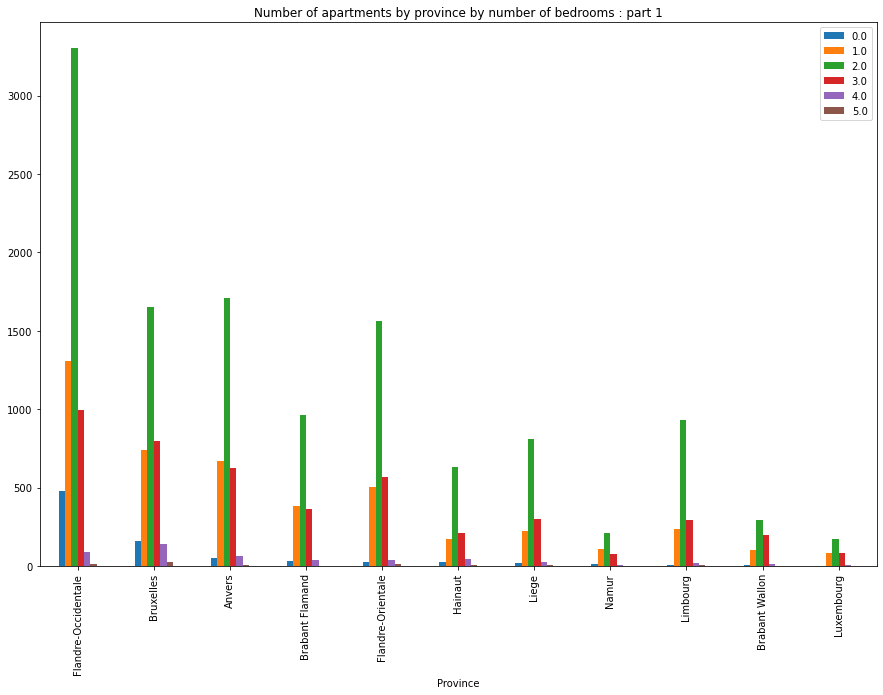

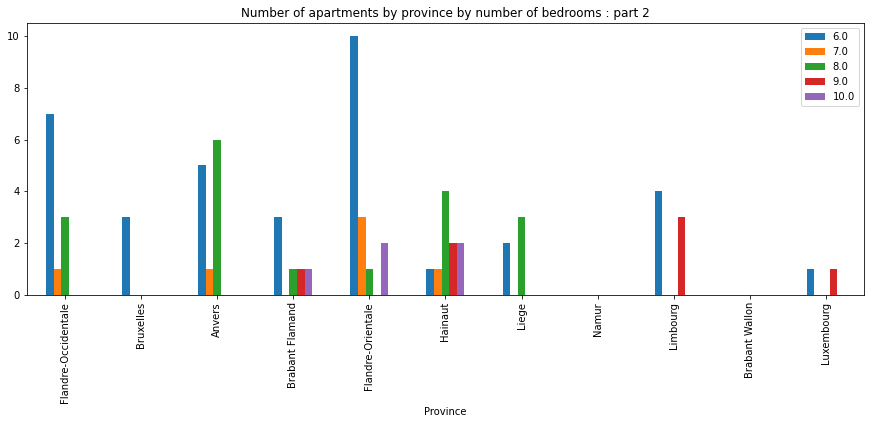

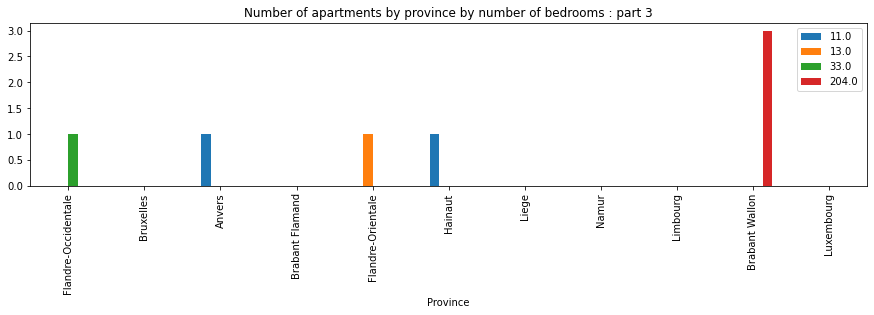

In [20]:
apart_province_bedrooms.plot.bar(x = 'Province', 
                                y = [0.0,
                                    1.0,
                                    2.0,
                                    3.0,
                                    4.0,
                                    5.0
                                   ],
                               figsize=(15,10),
                               title="Number of apartments by province by number of bedrooms : part 1")

apart_province_bedrooms.plot.bar(x = 'Province', 
                                y = [6.0,
                                    7.0,
                                    8.0,
                                    9.0,
                                    10.0
                                   ],
                               figsize=(15,5),
                               title="Number of apartments by province by number of bedrooms : part 2")

apart_province_bedrooms.plot.bar(x = 'Province', 
                                y = [11.0,
                                    13.0,
                                    33.0,
                                    204.0
                                   ],
                               figsize=(15,3),
                               title="Number of apartments by province by number of bedrooms : part 3")

#### By house area

In [21]:
locality_home_area = clean(df, [0,1,6])

locality : nbr ligne = 52077
52077
type_of_property : nbr ligne = 52077
52077
house_area : nbr ligne = 52077
43445


In [22]:
house_loc_area = locality_home_area[locality_home_area['type_of_property'] == 'house']
house_loc_area = house_loc_area.groupby('province').house_area.describe()
house_loc_area.reset_index(level=0, inplace=True)
house_loc_area


,province,count,mean,std,min,25%,50%,75%,max
0,Anvers,2681.0,208.549049,118.485149,42.0,142.0,182.0,243.0,3560.0
1,Brabant Flamand,2287.0,207.728465,97.299666,13.0,147.0,185.0,240.0,1339.0
2,Brabant Wallon,1237.0,207.446241,93.307863,51.0,146.0,188.0,248.0,850.0
3,Bruxelles,903.0,231.544850,101.203939,50.0,165.5,210.0,265.5,860.0
4,Flandre-Occidentale,2783.0,195.954366,103.587905,5.0,140.0,170.0,225.0,2019.0
5,Flandre-Orientale,2934.0,200.061350,104.910244,25.0,140.0,175.0,230.0,1640.0
6,Hainaut,3426.0,191.371862,131.780554,20.0,120.0,156.0,217.0,1900.0
7,Liege,2926.0,186.722830,121.188499,1.0,120.0,155.0,214.0,2400.0
8,Limbourg,1420.0,212.779577,109.089098,50.0,146.0,183.5,241.0,930.0
9,Luxembourg,900.0,215.236667,153.268268,28.0,130.0,180.0,255.0,2562.0


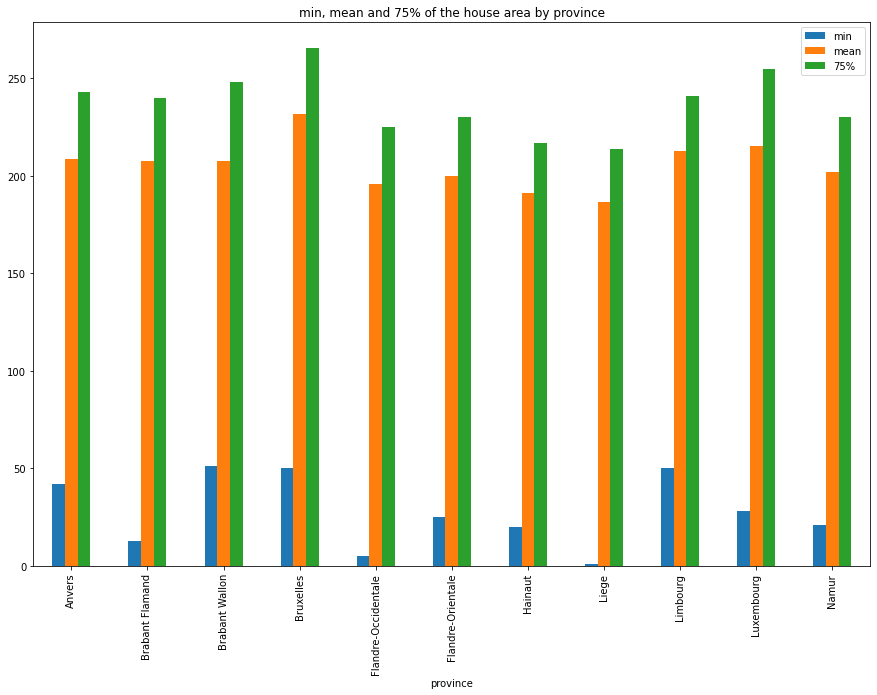

In [23]:
house_loc_area.plot.bar(x = 'province', 
                        y = ['min', 'mean', '75%'],
                       figsize=(15,10),
                       title="min, mean and 75% of the house area by province")

In [24]:
apart_loc_area = locality_home_area[locality_home_area['type_of_property'] == 'apartment']
apart_loc_area = apart_loc_area.groupby('province').house_area.describe()
apart_loc_area.reset_index(level=0, inplace=True)
apart_loc_area

,province,count,mean,std,min,25%,50%,75%,max
0,Anvers,2921.0,102.634714,45.777377,14.0,80.0,94.0,115.0,915.0
1,Brabant Flamand,1683.0,118.289364,771.377986,1.0,77.0,95.0,117.0,31700.0
2,Brabant Wallon,593.0,110.691400,44.169027,22.0,81.0,100.0,130.0,358.0
3,Bruxelles,3428.0,105.671237,47.815808,18.0,75.0,95.5,125.0,525.0
4,Flandre-Occidentale,5242.0,87.305227,39.911148,1.0,65.0,83.0,103.0,520.0
5,Flandre-Orientale,2439.0,104.284133,41.110478,13.0,82.0,98.0,117.0,776.0
6,Hainaut,965.0,108.174093,65.617801,21.0,79.0,93.0,117.0,730.0
7,Liege,1322.0,103.299546,46.177663,11.0,80.0,94.0,116.0,600.0
8,Limbourg,1361.0,106.415871,41.904694,21.0,85.0,97.0,116.0,559.0
9,Luxembourg,319.0,88.746082,28.493872,28.0,71.5,88.0,106.0,225.0


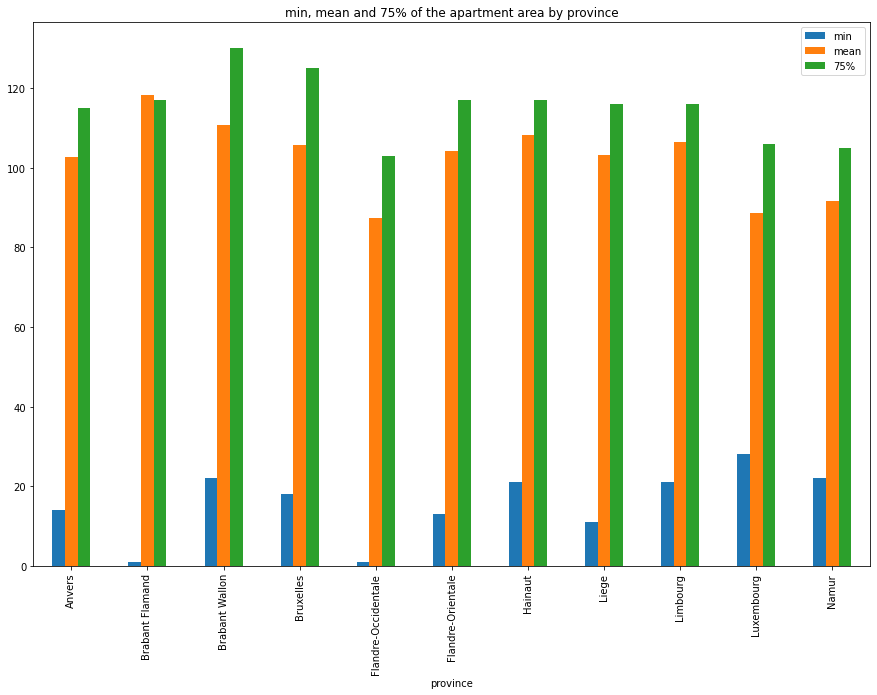

In [25]:
apart_loc_area.plot.bar(x = 'province', 
                        y = ['min', 'mean', '75%'],
                       figsize=(15,10),
                       title="min, mean and 75% of the apartment area by province")

#### By kitchen

In [26]:
locality_kitchen = clean(df, [0,1,7])

locality : nbr ligne = 52077
52077
type_of_property : nbr ligne = 52077
52077
fully_equipped_kitchen : nbr ligne = 52077
52077


In [27]:
house_loc_kitchen = locality_kitchen[locality_kitchen['type_of_property'] == 'house']
house_loc_kitchen_0 = house_loc_kitchen[house_loc_kitchen['fully_equipped_kitchen'] == 0].groupby('province').fully_equipped_kitchen.agg(['count'])
house_loc_kitchen_1 = house_loc_kitchen[house_loc_kitchen['fully_equipped_kitchen'] == 1].groupby('province').fully_equipped_kitchen.agg(['count'])

house_loc_kitchen_0.reset_index(level=0, inplace=True)
house_loc_kitchen_0 = house_loc_kitchen_0.rename(columns={'count':'No indication'})
house_loc_kitchen_1.reset_index(level=0, inplace=True)
house_loc_kitchen_1 = house_loc_kitchen_1.rename(columns={'count':'Indications'})

house_province_kitchen = pd.merge(house_loc_kitchen_0, house_loc_kitchen_1, how = 'outer', on='province')

house_province_kitchen

,province,No indication,Indications
0,Anvers,1068,2196
1,Brabant Flamand,875,1856
2,Brabant Wallon,314,998
3,Bruxelles,256,699
4,Flandre-Occidentale,1978,2400
5,Flandre-Orientale,1672,2193
6,Hainaut,1466,3163
7,Liege,1246,2361
8,Limbourg,743,1059
9,Luxembourg,391,775


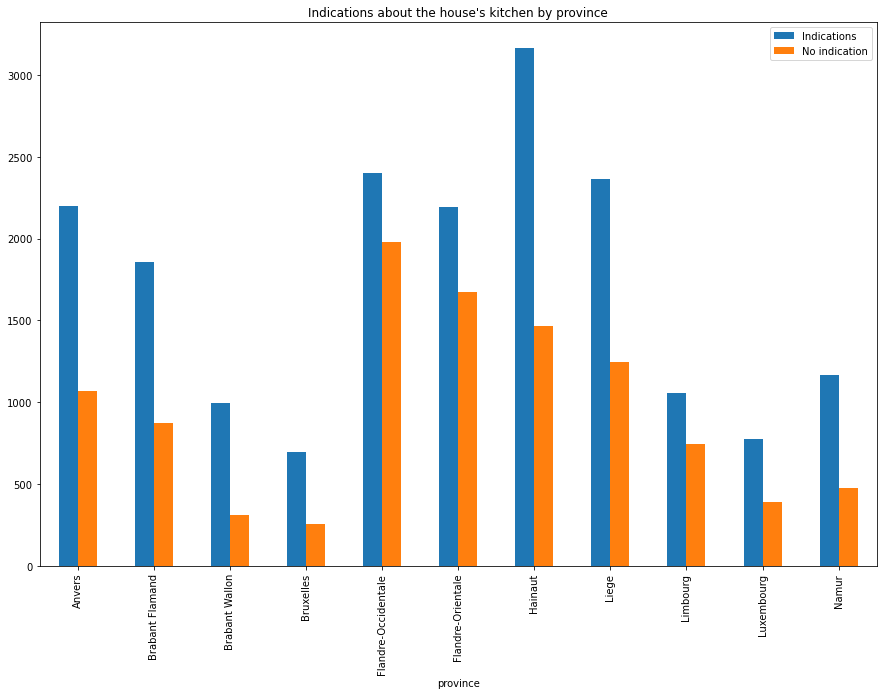

In [28]:
house_province_kitchen.plot.bar(x = 'province', 
                       y = ['Indications', 'No indication'], 
                       figsize=(15,10), 
                       title="Indications about the house's kitchen by province")

In [29]:
apart_loc_kitchen = locality_kitchen[locality_kitchen['type_of_property'] == 'apartment']
apart_loc_kitchen_0 = apart_loc_kitchen[apart_loc_kitchen['fully_equipped_kitchen'] == 0].groupby('province').fully_equipped_kitchen.agg(['count'])
apart_loc_kitchen_1 = apart_loc_kitchen[apart_loc_kitchen['fully_equipped_kitchen'] == 1].groupby('province').fully_equipped_kitchen.agg(['count'])

apart_loc_kitchen_0.reset_index(level=0, inplace=True)
apart_loc_kitchen_0 = apart_loc_kitchen_0.rename(columns={'count':'No indication'})
apart_loc_kitchen_1.reset_index(level=0, inplace=True)
apart_loc_kitchen_1 = apart_loc_kitchen_1.rename(columns={'count':'Indications'})

apart_province_kitchen = pd.merge(apart_loc_kitchen_0, apart_loc_kitchen_1, how = 'outer', on='province')

apart_province_kitchen

,province,No indication,Indications
0,Anvers,992,2150
1,Brabant Flamand,627,1161
2,Brabant Wallon,127,491
3,Bruxelles,625,2884
4,Flandre-Occidentale,2638,3566
5,Flandre-Orientale,1173,1556
6,Hainaut,222,868
7,Liege,430,961
8,Limbourg,564,932
9,Luxembourg,113,228


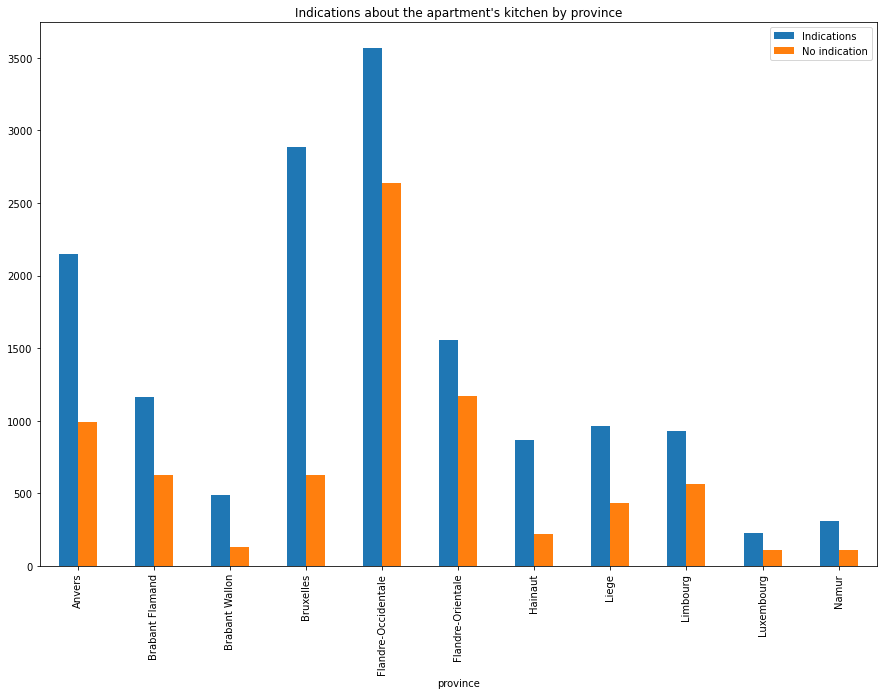

In [30]:
apart_province_kitchen.plot.bar(x = 'province', 
                       y = ['Indications', 'No indication'], 
                       figsize=(15,10), 
                       title="Indications about the apartment's kitchen by province")

#### By open fire

In [31]:
locality_fire = clean(df, [0,1,9])

locality : nbr ligne = 52077
52077
type_of_property : nbr ligne = 52077
52077
open_fire : nbr ligne = 52077
52077


In [32]:
house_loc_fire = locality_fire[locality_fire['type_of_property'] == 'house']
house_loc_fire_0 = house_loc_fire[house_loc_fire['open_fire'] == 0].groupby('province').fully_equipped_kitchen.agg(['count'])
house_loc_fire_1 = house_loc_fire[house_loc_fire['open_fire'] == 1].groupby('province').fully_equipped_kitchen.agg(['count'])

house_loc_fire_0.reset_index(level=0, inplace=True)
house_loc_fire_0 = house_loc_fire_0.rename(columns={'count':'No open fire'})
house_loc_fire_1.reset_index(level=0, inplace=True)
house_loc_fire_1 = house_loc_fire_1.rename(columns={'count':'Open Fire'})

house_province_fire = pd.merge(house_loc_fire_0, house_loc_fire_1, how = 'outer', on='province')

house_province_fire

,province,No open fire,Open Fire
0,Anvers,3049,215
1,Brabant Flamand,2510,221
2,Brabant Wallon,1059,253
3,Bruxelles,881,74
4,Flandre-Occidentale,4158,220
5,Flandre-Orientale,3639,226
6,Hainaut,4369,260
7,Liege,3380,227
8,Limbourg,1695,107
9,Luxembourg,1045,121


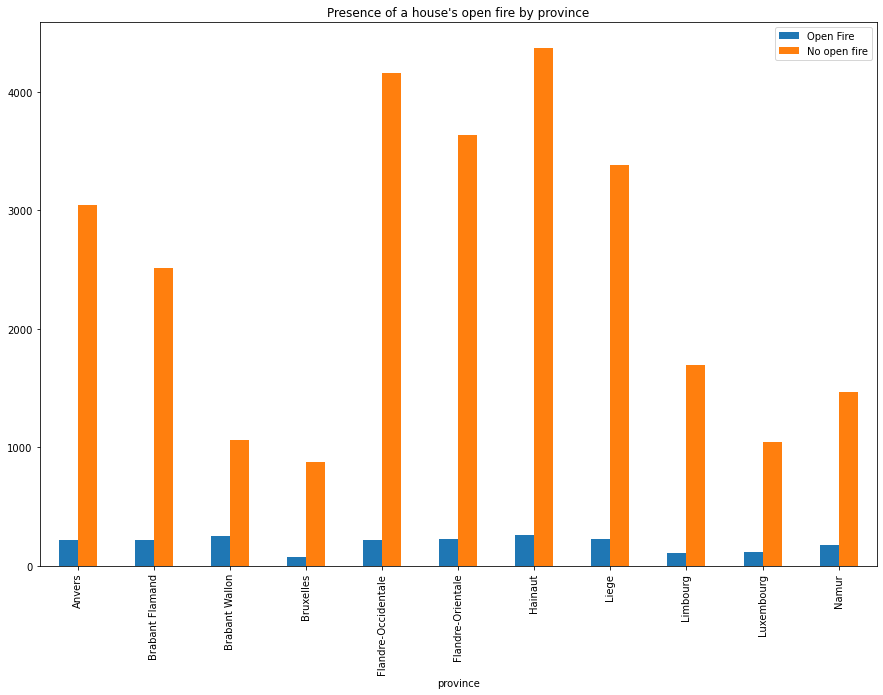

In [33]:
house_province_fire.plot.bar(x = 'province', 
                       y = ['Open Fire', 'No open fire'], 
                       figsize=(15,10), 
                       title="Presence of a house's open fire by province")

In [34]:
apart_loc_fire = locality_fire[locality_fire['type_of_property'] == 'apartment']
apart_loc_fire_0 = apart_loc_fire[apart_loc_fire['open_fire'] == 0].groupby('province').fully_equipped_kitchen.agg(['count'])
apart_loc_fire_1 = apart_loc_fire[apart_loc_fire['open_fire'] == 1].groupby('province').fully_equipped_kitchen.agg(['count'])

apart_loc_fire_0.reset_index(level=0, inplace=True)
apart_loc_fire_0 = apart_loc_fire_0.rename(columns={'count':'No open fire'})
apart_loc_fire_1.reset_index(level=0, inplace=True)
apart_loc_fire_1 = apart_loc_fire_1.rename(columns={'count':'Open Fire'})

apart_province_fire = pd.merge(apart_loc_fire_0, apart_loc_fire_1, how = 'outer', on='province')

apart_province_fire

,province,No open fire,Open Fire
0,Anvers,3106,36
1,Brabant Flamand,1765,23
2,Brabant Wallon,605,13
3,Bruxelles,3371,138
4,Flandre-Occidentale,6152,52
5,Flandre-Orientale,2714,15
6,Hainaut,1082,8
7,Liege,1381,10
8,Limbourg,1487,9
9,Luxembourg,307,34


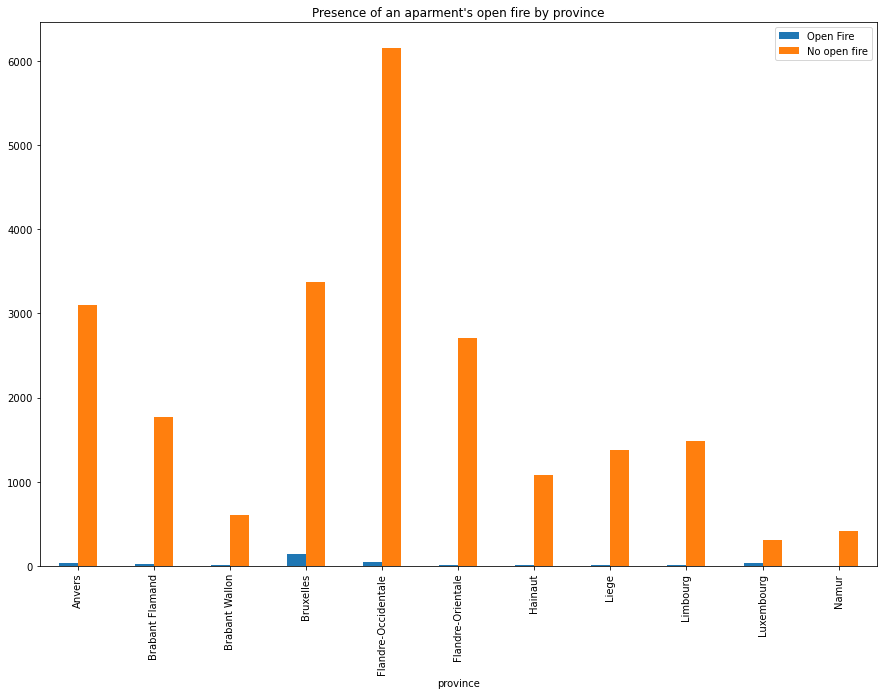

In [35]:
apart_province_fire.plot.bar(x = 'province', 
                       y = ['Open Fire', 'No open fire'], 
                       figsize=(15,10), 
                       title="Presence of an aparment's open fire by province")

#### By presence of a terrace

In [36]:
locality_terrace = clean(df, [0,1,10])

locality : nbr ligne = 52077
52077
type_of_property : nbr ligne = 52077
52077
terrace : nbr ligne = 52077
52077


In [37]:
house_loc_terrace = locality_terrace[locality_terrace['type_of_property'] == 'house']
house_loc_terrace_0 = house_loc_terrace[house_loc_terrace['terrace'] == 0].groupby('province').fully_equipped_kitchen.agg(['count'])
house_loc_terrace_1 = house_loc_terrace[house_loc_terrace['terrace'] == 1].groupby('province').fully_equipped_kitchen.agg(['count'])

house_loc_terrace_0.reset_index(level=0, inplace=True)
house_loc_terrace_0 = house_loc_terrace_0.rename(columns={'count':'No terrace'})
house_loc_terrace_1.reset_index(level=0, inplace=True)
house_loc_terrace_1 = house_loc_terrace_1.rename(columns={'count':'Terrace'})

house_province_terrace = pd.merge(house_loc_terrace_0, house_loc_terrace_1, how = 'outer', on='province')

house_province_terrace

,province,No terrace,Terrace
0,Anvers,1625,1639
1,Brabant Flamand,1248,1483
2,Brabant Wallon,333,979
3,Bruxelles,396,559
4,Flandre-Occidentale,2761,1617
5,Flandre-Orientale,2104,1761
6,Hainaut,2303,2326
7,Liege,1550,2057
8,Limbourg,1131,671
9,Luxembourg,599,567


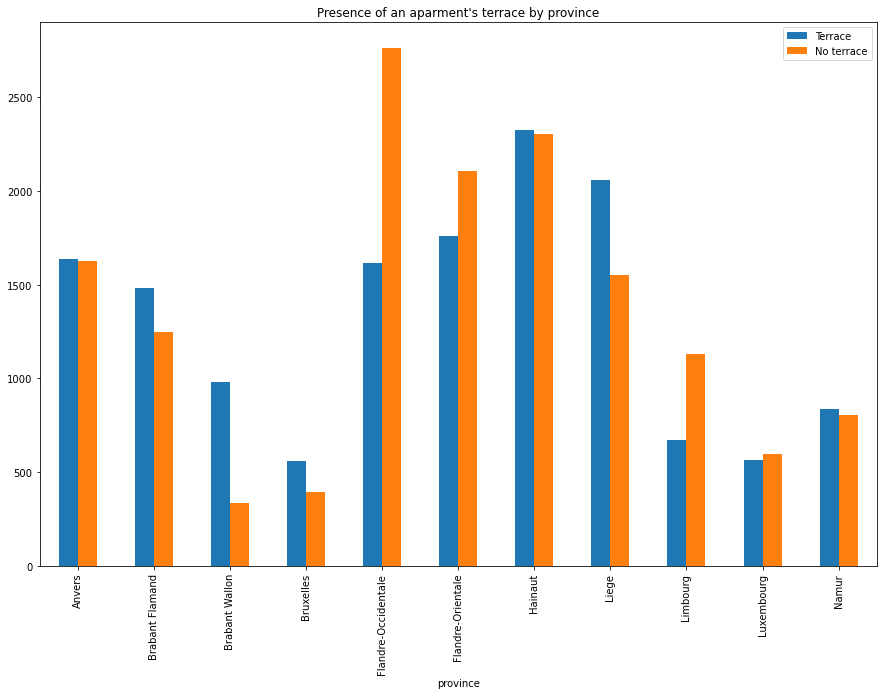

In [38]:
house_province_terrace.plot.bar(x = 'province', 
                       y = ['Terrace', 'No terrace'], 
                       figsize=(15,10), 
                       title="Presence of an aparment's terrace by province")

In [39]:
apart_loc_terrace = locality_terrace[locality_terrace['type_of_property'] == 'apartment']
apart_loc_terrace_0 = apart_loc_terrace[apart_loc_terrace['terrace'] == 0].groupby('province').fully_equipped_kitchen.agg(['count'])
apart_loc_terrace_1 = apart_loc_terrace[apart_loc_terrace['terrace'] == 1].groupby('province').fully_equipped_kitchen.agg(['count'])

apart_loc_terrace_0.reset_index(level=0, inplace=True)
apart_loc_terrace_0 = apart_loc_terrace_0.rename(columns={'count':'No terrace'})
apart_loc_terrace_1.reset_index(level=0, inplace=True)
apart_loc_terrace_1 = apart_loc_terrace_1.rename(columns={'count':'Terrace'})

apart_province_terrace = pd.merge(apart_loc_terrace_0, apart_loc_terrace_1, how = 'outer', on='province')

apart_province_terrace

,province,No terrace,Terrace
0,Anvers,867,2275
1,Brabant Flamand,508,1280
2,Brabant Wallon,123,495
3,Bruxelles,1086,2423
4,Flandre-Occidentale,2682,3522
5,Flandre-Orientale,799,1930
6,Hainaut,465,625
7,Liege,446,945
8,Limbourg,567,929
9,Luxembourg,147,194


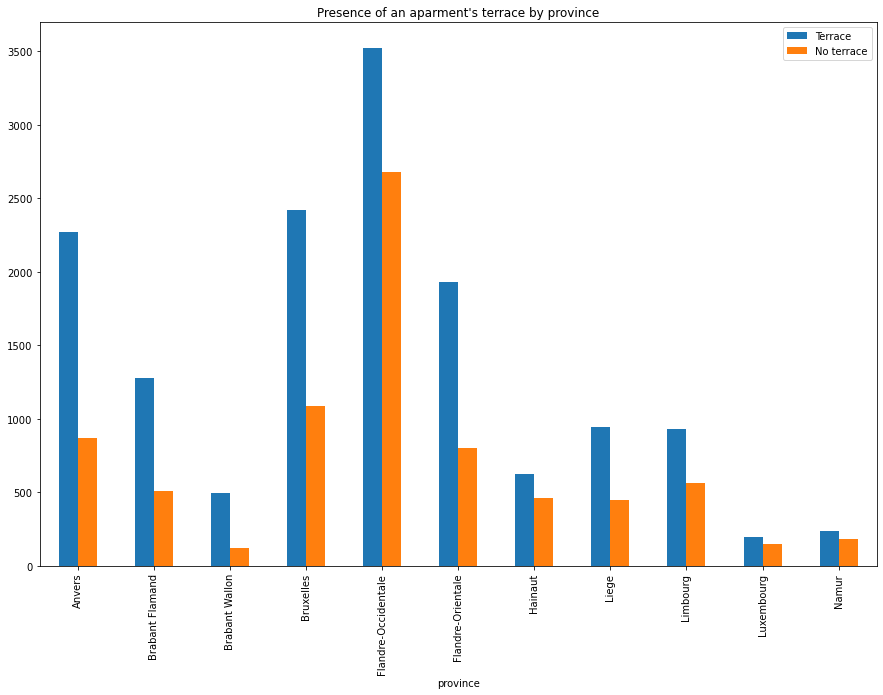

In [40]:
apart_province_terrace.plot.bar(x = 'province', 
                       y = ['Terrace', 'No terrace'], 
                       figsize=(15,10), 
                       title="Presence of an aparment's terrace by province")

#### By area of the terrace

In [42]:
locality_terrace = clean(df, [0,1,11])
locality_terrace = locality_terrace[locality_terrace['terrace'] == 1]
locality_terrace.shape

locality : nbr ligne = 52077
52077
type_of_property : nbr ligne = 52077
52077
terrace_area : nbr ligne = 52077


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [43]:
house_loc_terr_area = locality_terrace[locality_terrace['type_of_property'] == 'house']
house_loc_terr_area = house_loc_terr_area.groupby('province').terrace_area.describe()
house_loc_terr_area.reset_index(level=0, inplace=True)
house_loc_terr_area

,province,count,mean,std,min,25%,50%,75%,max
0,Anvers,3264.0,6.034314,19.863881,0.0,0.0,0.0,0.0,708.0
1,Brabant Flamand,2731.0,8.702307,22.111083,0.0,0.0,0.0,10.0,600.0
2,Brabant Wallon,1312.0,15.895579,27.758365,0.0,0.0,0.0,25.0,371.0
3,Bruxelles,955.0,9.713089,18.686181,0.0,0.0,0.0,15.0,300.0
4,Flandre-Occidentale,4378.0,3.229100,13.277922,0.0,0.0,0.0,0.0,265.0
5,Flandre-Orientale,3865.0,5.499612,17.209901,0.0,0.0,0.0,0.0,350.0
6,Hainaut,4629.0,7.931735,23.446792,0.0,0.0,0.0,0.0,584.0
7,Liege,3607.0,10.850291,24.173568,0.0,0.0,0.0,16.5,500.0
8,Limbourg,1802.0,5.340733,16.670581,0.0,0.0,0.0,0.0,250.0
9,Luxembourg,1166.0,7.446827,20.635571,0.0,0.0,0.0,0.0,200.0


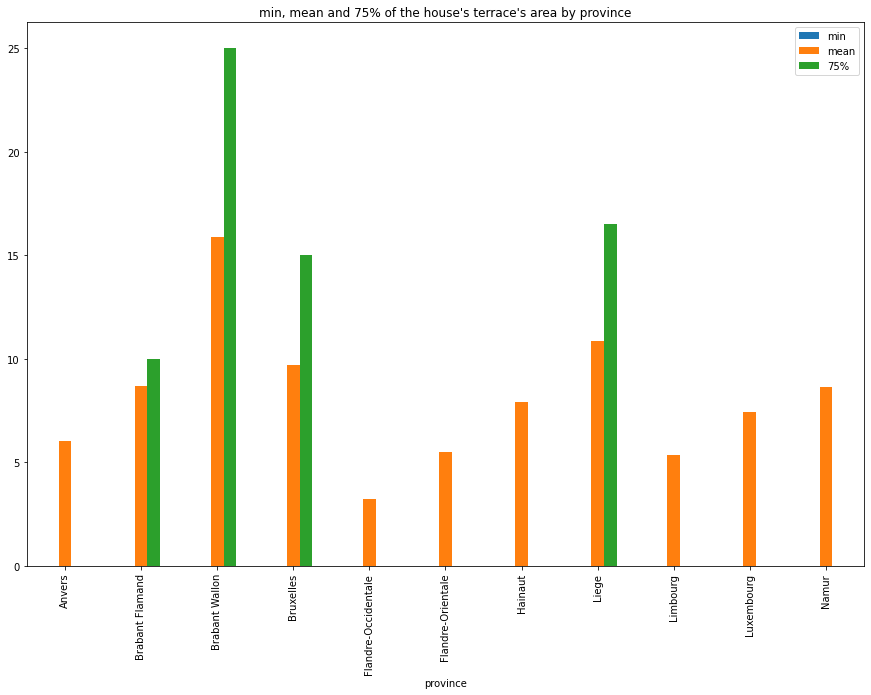

In [44]:
house_loc_terr_area.plot.bar(x = 'province', 
                        y = ['min', 'mean', '75%'],
                       figsize=(15,10),
                       title="min, mean and 75% of the house's terrace's area by province")

In [45]:
apart_loc_terr_area = locality_terrace[locality_terrace['type_of_property'] == 'apartment']
apart_loc_terr_area = apart_loc_terr_area.groupby('province').terrace_area.describe()
apart_loc_terr_area.reset_index(level=0, inplace=True)
apart_loc_terr_area

,province,count,mean,std,min,25%,50%,75%,max
0,Anvers,3142.0,10.252069,27.462564,0.0,0.0,4.0,12.0,1150.0
1,Brabant Flamand,1788.0,11.131432,22.372690,0.0,0.0,6.0,15.0,600.0
2,Brabant Wallon,618.0,14.580906,20.294927,0.0,0.0,9.0,20.0,220.0
3,Bruxelles,3509.0,10.141066,17.643767,0.0,0.0,4.0,13.0,330.0
4,Flandre-Occidentale,6204.0,5.319471,15.404277,0.0,0.0,0.0,4.0,225.0
5,Flandre-Orientale,2729.0,9.621473,28.703280,0.0,0.0,2.0,12.0,1020.0
6,Hainaut,1090.0,7.966055,19.474118,0.0,0.0,0.0,10.0,400.0
7,Liege,1391.0,8.695183,14.729522,0.0,0.0,3.0,11.0,140.0
8,Limbourg,1496.0,10.525401,18.387196,0.0,0.0,1.5,15.0,180.0
9,Luxembourg,341.0,5.554252,11.675294,0.0,0.0,0.0,8.0,115.0


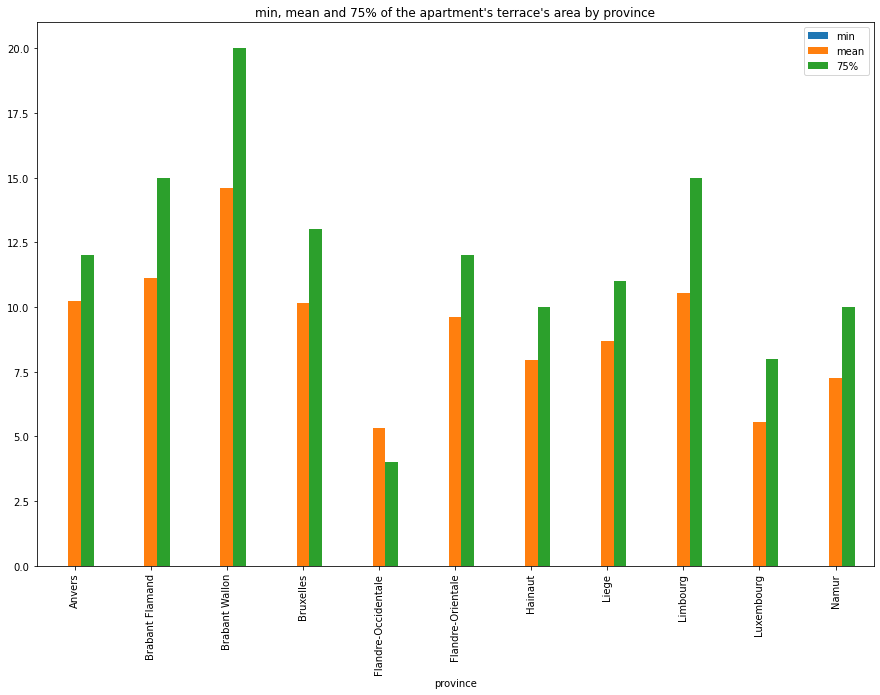

In [46]:
apart_loc_terr_area.plot.bar(x = 'province', 
                        y = ['min', 'mean', '75%'],
                       figsize=(15,10),
                       title="min, mean and 75% of the apartment's terrace's area by province")

#### By presence of a garden 

In [47]:
locality_garden = clean(df, [0,1,12])

locality : nbr ligne = 52077
52077
type_of_property : nbr ligne = 52077
52077
garden : nbr ligne = 52077
52077


In [48]:
house_loc_garden = locality_garden[locality_garden['type_of_property'] == 'house']
house_loc_garden_0 = house_loc_garden[house_loc_garden['garden'] == 0].groupby('province').fully_equipped_kitchen.agg(['count'])
house_loc_garden_1 = house_loc_garden[house_loc_garden['garden'] == 1].groupby('province').fully_equipped_kitchen.agg(['count'])

house_loc_garden_0.reset_index(level=0, inplace=True)
house_loc_garden_0 = house_loc_garden_0.rename(columns={'count':'No garden'})
house_loc_garden_1.reset_index(level=0, inplace=True)
house_loc_garden_1 = house_loc_garden_1.rename(columns={'count':'Garden'})

house_province_garden = pd.merge(house_loc_garden_0, house_loc_garden_1, how = 'outer', on='province')

house_province_garden

,province,No garden,Garden
0,Anvers,1859,1405
1,Brabant Flamand,1568,1163
2,Brabant Wallon,594,718
3,Bruxelles,489,466
4,Flandre-Occidentale,2565,1813
5,Flandre-Orientale,2253,1612
6,Hainaut,3173,1456
7,Liege,2171,1436
8,Limbourg,1138,664
9,Luxembourg,719,447


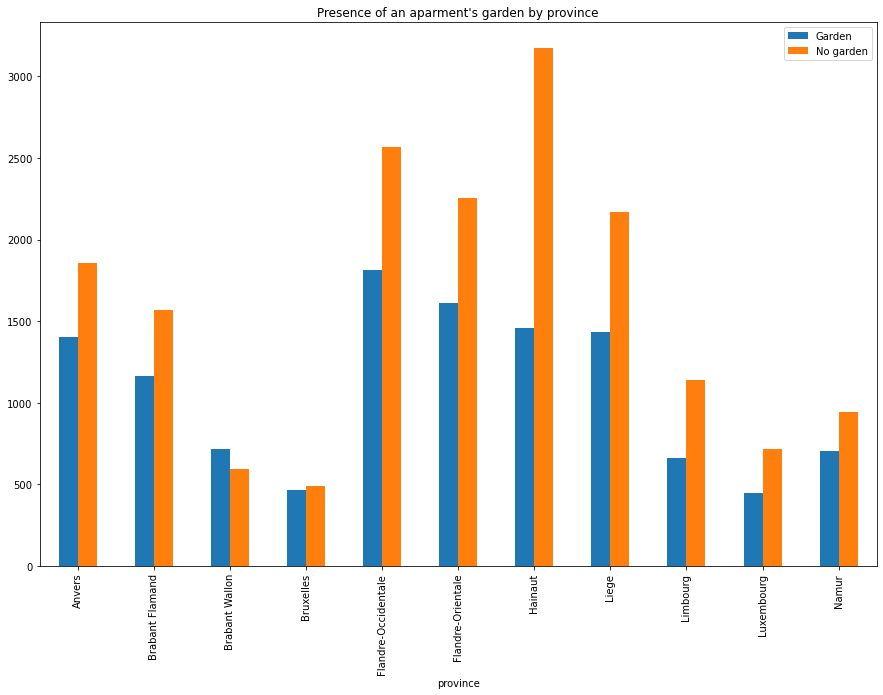

In [49]:
house_province_garden.plot.bar(x = 'province', 
                       y = ['Garden', 'No garden'], 
                       figsize=(15,10), 
                       title="Presence of an aparment's garden by province")

In [50]:
apart_loc_garden = locality_garden[locality_garden['type_of_property'] == 'apartment']
apart_loc_garden_0 = apart_loc_garden[apart_loc_garden['garden'] == 0].groupby('province').fully_equipped_kitchen.agg(['count'])
apart_loc_garden_1 = apart_loc_garden[apart_loc_garden['garden'] == 1].groupby('province').fully_equipped_kitchen.agg(['count'])

apart_loc_garden_0.reset_index(level=0, inplace=True)
apart_loc_garden_0 = apart_loc_garden_0.rename(columns={'count':'No garden'})
apart_loc_garden_1.reset_index(level=0, inplace=True)
apart_loc_garden_1 = apart_loc_garden_1.rename(columns={'count':'Garden'})

apart_province_garden = pd.merge(apart_loc_garden_0, apart_loc_garden_1, how = 'outer', on='province')

apart_province_garden

,province,No garden,Garden
0,Anvers,2699,443
1,Brabant Flamand,1504,284
2,Brabant Wallon,469,149
3,Bruxelles,3187,322
4,Flandre-Occidentale,5352,852
5,Flandre-Orientale,2192,537
6,Hainaut,967,123
7,Liege,1243,148
8,Limbourg,1234,262
9,Luxembourg,304,37


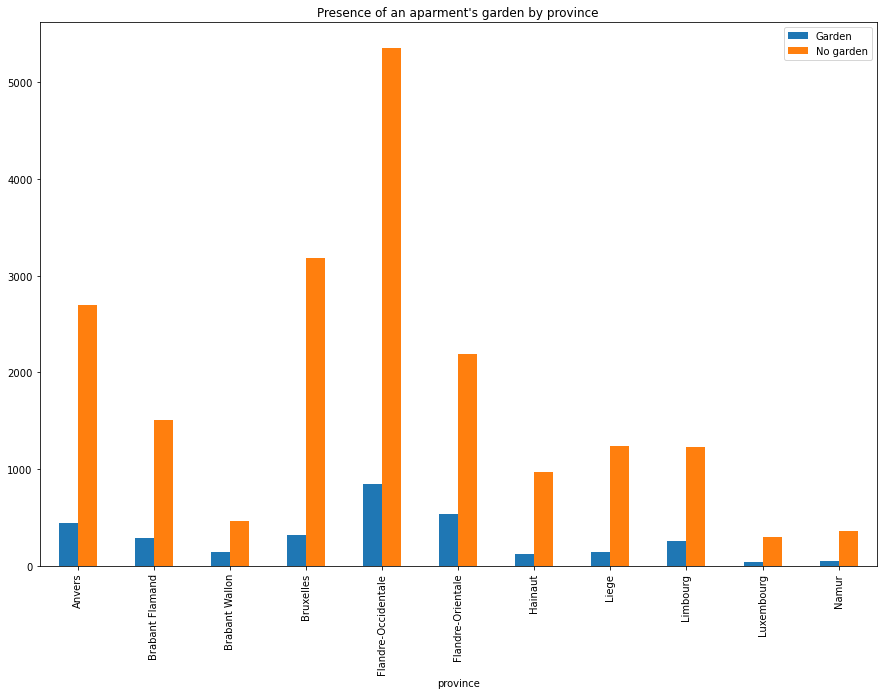

In [51]:
apart_province_garden.plot.bar(x = 'province', 
                       y = ['Garden', 'No garden'], 
                       figsize=(15,10), 
                       title="Presence of an aparment's garden by province")

#### By area of the garden

In [52]:
locality_garden = clean(df, [0,1,13])
locality_garden = locality_garden[locality_garden['garden'] == 1]
locality_garden.shape

locality : nbr ligne = 52077
52077
type_of_property : nbr ligne = 52077
52077
garden_area : nbr ligne = 52077


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [53]:
house_loc_gard_area = locality_garden[locality_garden['type_of_property'] == 'house']
house_loc_gard_area = house_loc_gard_area.groupby('province').garden_area.describe()
house_loc_gard_area.reset_index(level=0, inplace=True)
house_loc_gard_area

,province,count,mean,std,min,25%,50%,75%,max
0,Anvers,3264.0,141.132966,1356.996089,0.0,0.0,0.0,16.25,63000.0
1,Brabant Flamand,2731.0,199.242036,1208.849243,0.0,0.0,0.0,0.50,29500.0
2,Brabant Wallon,1312.0,353.820122,2573.523342,0.0,0.0,0.0,232.50,88800.0
3,Bruxelles,955.0,49.732984,103.295930,0.0,0.0,0.0,60.00,1400.0
4,Flandre-Occidentale,4378.0,79.790772,920.893155,0.0,0.0,0.0,0.00,39500.0
5,Flandre-Orientale,3865.0,95.561190,881.546440,0.0,0.0,0.0,0.00,43800.0
6,Hainaut,4629.0,170.814863,1109.406896,0.0,0.0,0.0,0.00,58000.0
7,Liege,3607.0,199.700028,861.646070,0.0,0.0,0.0,86.00,28225.0
8,Limbourg,1802.0,161.124306,918.090883,0.0,0.0,0.0,0.00,31161.0
9,Luxembourg,1166.0,278.719554,1498.158167,0.0,0.0,0.0,0.00,40370.0


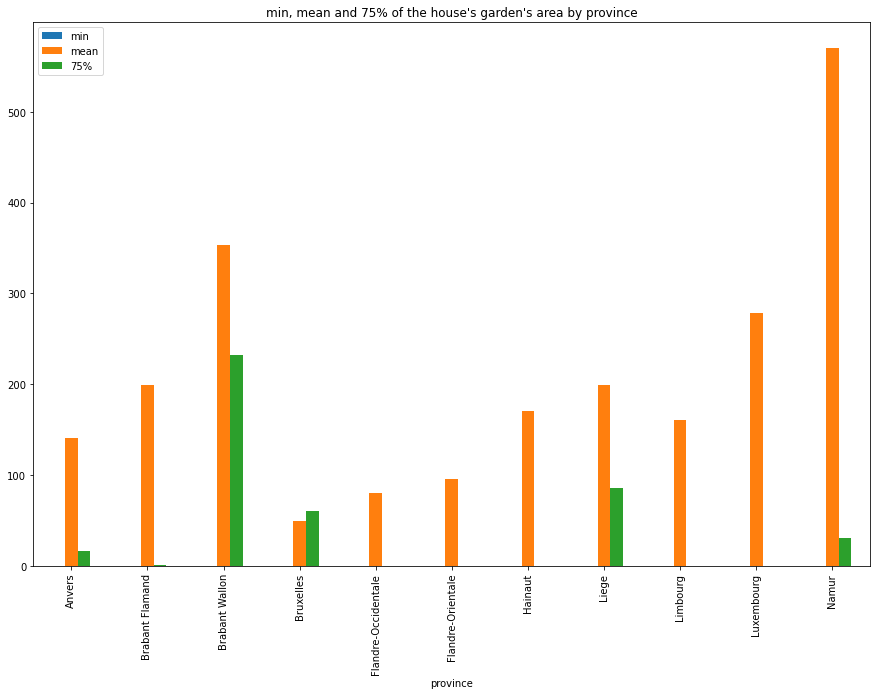

In [54]:
house_loc_gard_area.plot.bar(x = 'province', 
                        y = ['min', 'mean', '75%'],
                       figsize=(15,10),
                       title="min, mean and 75% of the house's garden's area by province")

In [55]:
apart_loc_gard_area = locality_garden[locality_garden['type_of_property'] == 'apartment']
apart_loc_gard_area = apart_loc_gard_area.groupby('province').garden_area.describe()
apart_loc_gard_area.reset_index(level=0, inplace=True)
apart_loc_gard_area

,province,count,mean,std,min,25%,50%,75%,max
0,Anvers,3142.0,28.896244,933.725024,0.0,0.0,0.0,0.0,50000.0
1,Brabant Flamand,1788.0,11.258949,81.991678,0.0,0.0,0.0,0.0,2500.0
2,Brabant Wallon,618.0,143.181230,1399.153286,0.0,0.0,0.0,0.0,25000.0
3,Bruxelles,3509.0,48.187803,1054.636816,0.0,0.0,0.0,0.0,50000.0
4,Flandre-Occidentale,6204.0,18.172792,1085.474338,0.0,0.0,0.0,0.0,85000.0
5,Flandre-Orientale,2729.0,58.649689,618.389486,0.0,0.0,0.0,0.0,15400.0
6,Hainaut,1090.0,9.830275,68.505331,0.0,0.0,0.0,0.0,1000.0
7,Liege,1391.0,17.613228,225.470695,0.0,0.0,0.0,0.0,8000.0
8,Limbourg,1496.0,18.838235,213.545247,0.0,0.0,0.0,0.0,5000.0
9,Luxembourg,341.0,11.000000,82.427687,0.0,0.0,0.0,0.0,1390.0


In [ ]:
apart_loc_gard_area.plot.bar(x = 'province', 
                        y = ['min', 'mean', '75%'],
                       figsize=(15,10),
                       title="min, mean and 75% of the apartment's garden's area by province")

#### By surface of the land 

#### By number of facades 

#### By presence of a swimming pool 

#### By state of the building

#### By construction year

## Type of property

## Subtype of property

## Number of bedrooms

## House area

## Kitchen

## Furnished